# 3차 프로그래밍 과제
* C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv

## (1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오. 
* 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

MYCT     1
MMIN     1
MMAX     1
CACH     1
CHMIN    1
CHMAX    1
PRP      1
dtype: int64
    MYCT    MMIN     MMAX   CACH  CHMIN  CHMAX    PRP
1  125.0   256.0   6000.0  256.0   16.0  128.0  198.0
2   29.0  8000.0  32000.0   32.0    8.0   32.0  269.0
3   29.0  8000.0  32000.0   32.0    8.0   32.0  220.0
4   29.0  8000.0  32000.0   32.0    8.0   32.0  172.0
5   29.0  8000.0  16000.0   32.0    8.0   16.0  132.0
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.0000

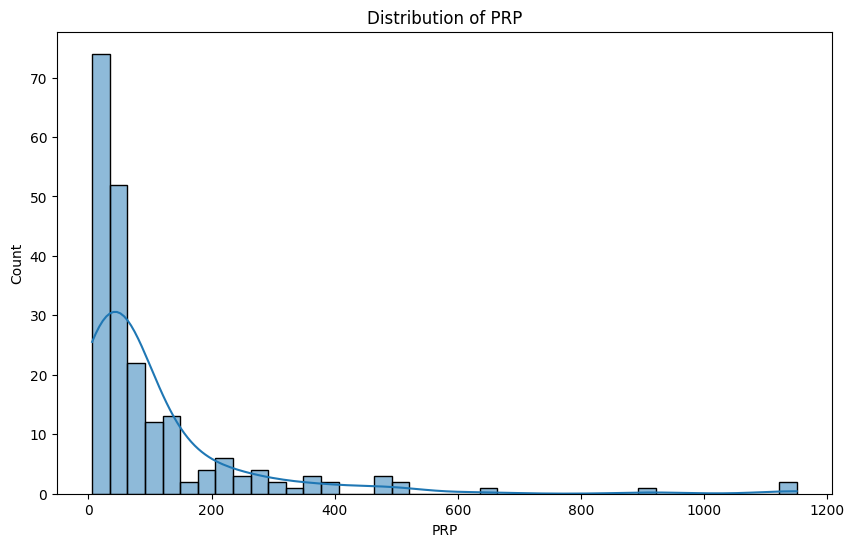

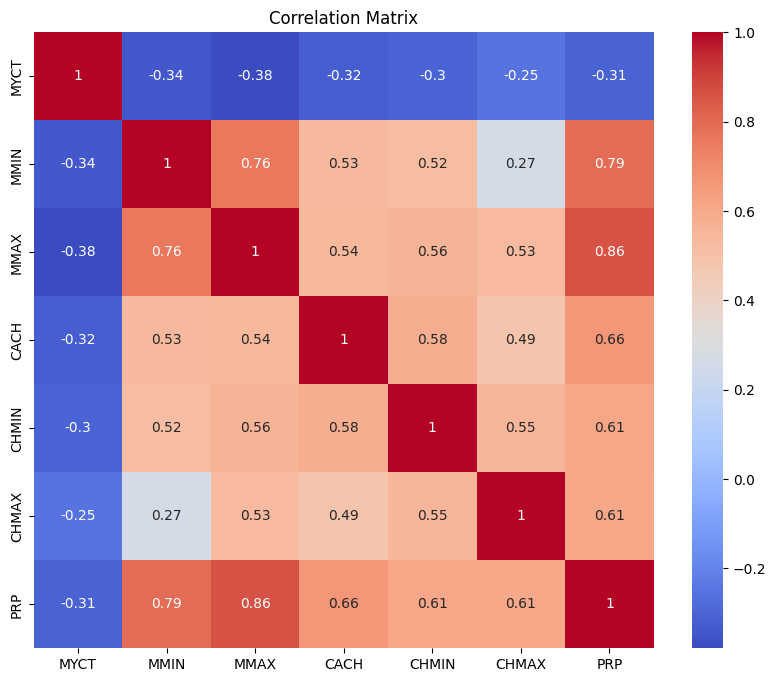

Cross-validation R^2 scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Mean cross-validation R^2 score: 0.6508224821731219
Training Data - Mean Squared Error (MSE): 3117.658905430177
Training Data - Mean Absolute Error (MAE): 35.12200634651682
Training Data - R^2 Score: 0.8378284557995717
Test Data - Mean Squared Error (MSE): 5633.068155793262
Test Data - Mean Absolute Error (MAE): 48.06880134700473
Test Data - R^2 Score: 0.8893455830696774


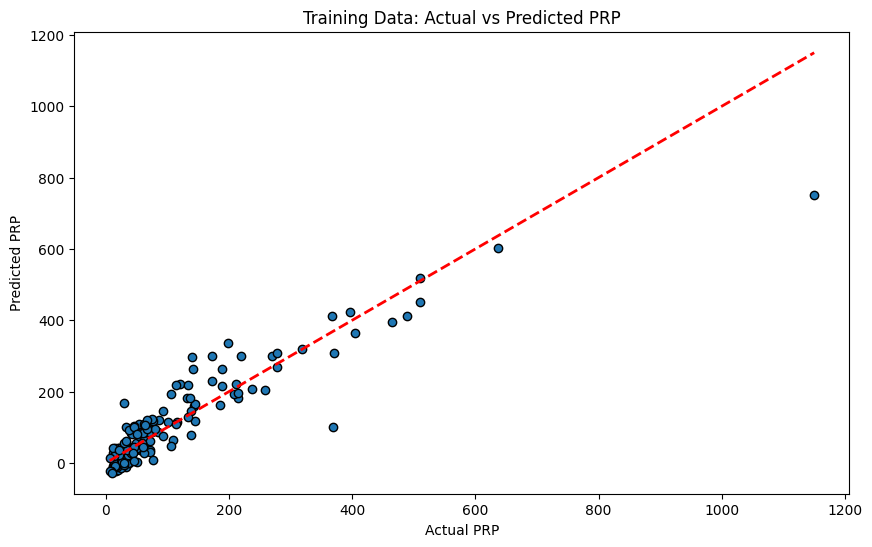

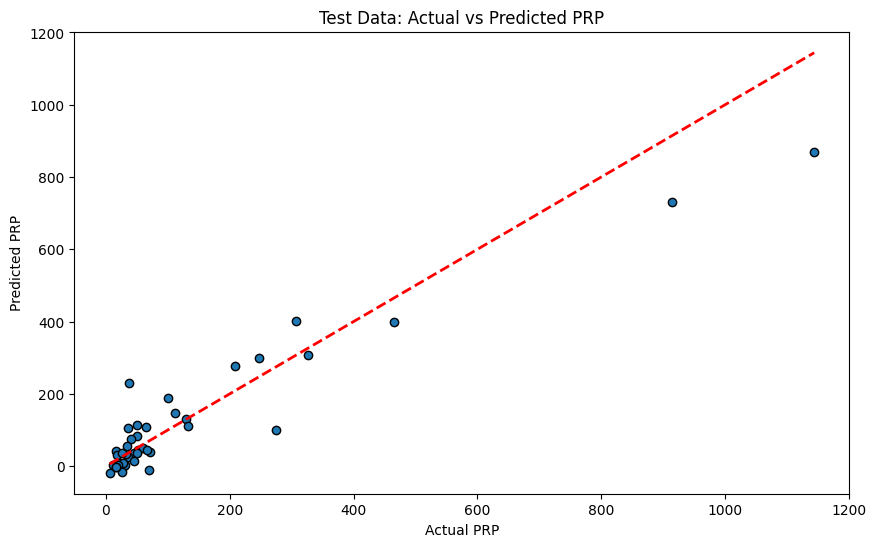

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
print(numeric_data.isnull().sum())
numeric_data = numeric_data.dropna()

# 데이터 탐색
print(numeric_data.head())
print(numeric_data.describe())
print(numeric_data.info())

# 타겟 변수인 PRP에 대한 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(numeric_data['PRP'], kde=True)
plt.title('Distribution of PRP')
plt.show()

# 특징 변수 간의 상관 관계
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 특징과 타겟 변수 정의
features = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
target = numeric_data["PRP"]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cross_val_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cross_val_scores)}")

# 훈련 데이터 성능 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Data - Mean Squared Error (MSE): {train_mse}")
print(f"Training Data - Mean Absolute Error (MAE): {train_mae}")
print(f"Training Data - R^2 Score: {train_r2}")

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Data - Mean Squared Error (MSE): {test_mse}")
print(f"Test Data - Mean Absolute Error (MAE): {test_mae}")
print(f"Test Data - R^2 Score: {test_r2}")

# 실제 값과 예측 값 시각화 (훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Training Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Test Data: Actual vs Predicted PRP")
plt.show()


## (2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
* Mean squared Error, Mean absolute Error, R^2, 교차 검증

MYCT     1
MMIN     1
MMAX     1
CACH     1
CHMIN    1
CHMAX    1
PRP      1
dtype: int64
Cross-validation R^2 scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Mean cross-validation R^2 score: 0.6508224821731219
Training Data - Mean Squared Error (MSE): 3117.658905430177
Training Data - Mean Absolute Error (MAE): 35.12200634651682
Training Data - R^2 Score: 0.8378284557995717
Test Data - Mean Squared Error (MSE): 5633.068155793262
Test Data - Mean Absolute Error (MAE): 48.06880134700473
Test Data - R^2 Score: 0.8893455830696774


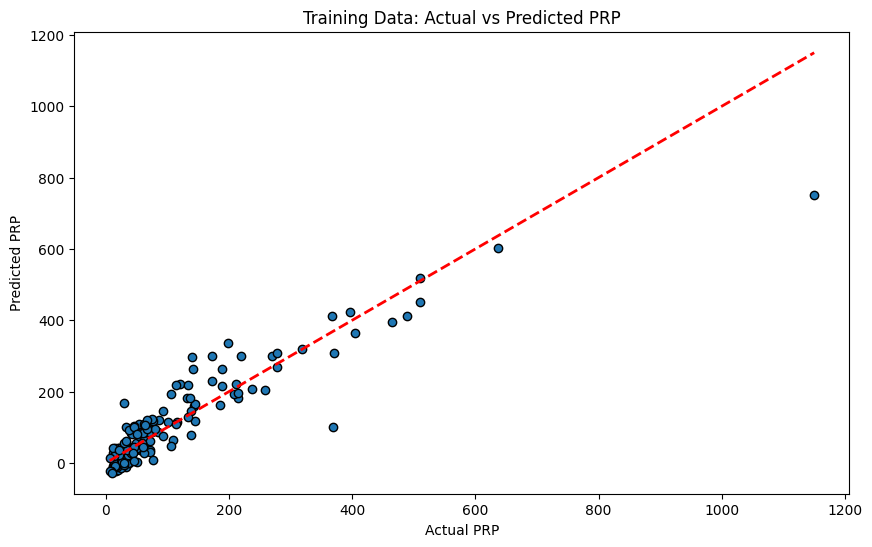

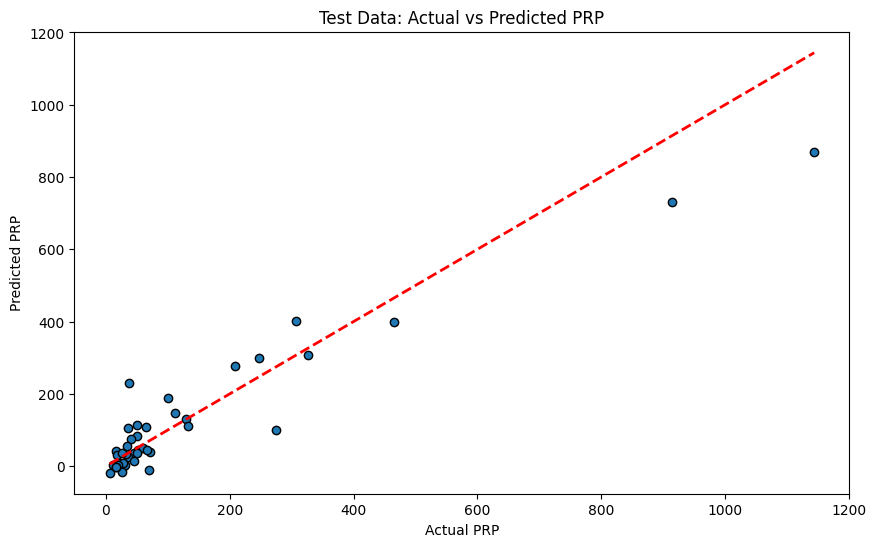

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
print(numeric_data.isnull().sum())
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
features = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
target = numeric_data["PRP"]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cross_val_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cross_val_scores)}")

# 훈련 데이터 성능 평가
y_train_pred = model.predict(X_train)
train_mse_basic = mean_squared_error(y_train, y_train_pred)
train_mae_basic = mean_absolute_error(y_train, y_train_pred)
train_r2_basic = r2_score(y_train, y_train_pred)

print(f"Training Data - Mean Squared Error (MSE): {train_mse}")
print(f"Training Data - Mean Absolute Error (MAE): {train_mae}")
print(f"Training Data - R^2 Score: {train_r2}")

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)
test_mse_basic = mean_squared_error(y_test, y_test_pred)
test_mae_basic = mean_absolute_error(y_test, y_test_pred)
test_r2_basic = r2_score(y_test, y_test_pred)

print(f"Test Data - Mean Squared Error (MSE): {test_mse}")
print(f"Test Data - Mean Absolute Error (MAE): {test_mae}")
print(f"Test Data - R^2 Score: {test_r2}")

# 실제 값과 예측 값 시각화 (훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Training Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Test Data: Actual vs Predicted PRP")
plt.show()


## (3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오. 

Random Forest - Cross-validation R^2 scores: [0.51720865 0.7583983  0.85565195 0.93687233 0.91273156]
Random Forest - Mean cross-validation R^2 score: 0.7961725592314367
Gradient Boosting - Cross-validation R^2 scores: [0.5943399  0.6582964  0.86749478 0.92470359 0.86621851]
Gradient Boosting - Mean cross-validation R^2 score: 0.7822106362095962
Random Forest - Training Data - Mean Squared Error (MSE): 881.8077018830863
Random Forest - Training Data - Mean Absolute Error (MAE): 11.501979113202166
Random Forest - Training Data - R^2 Score: 0.9541309293158614
Random Forest - Test Data - Mean Squared Error (MSE): 6603.907626747705
Random Forest - Test Data - Mean Absolute Error (MAE): 34.75401927437641
Random Forest - Test Data - R^2 Score: 0.8702746837621793
Gradient Boosting - Training Data - Mean Squared Error (MSE): 206.13991568998594
Gradient Boosting - Training Data - Mean Absolute Error (MAE): 9.495366089990394
Gradient Boosting - Training Data - R^2 Score: 0.9892772014313161
Gradi

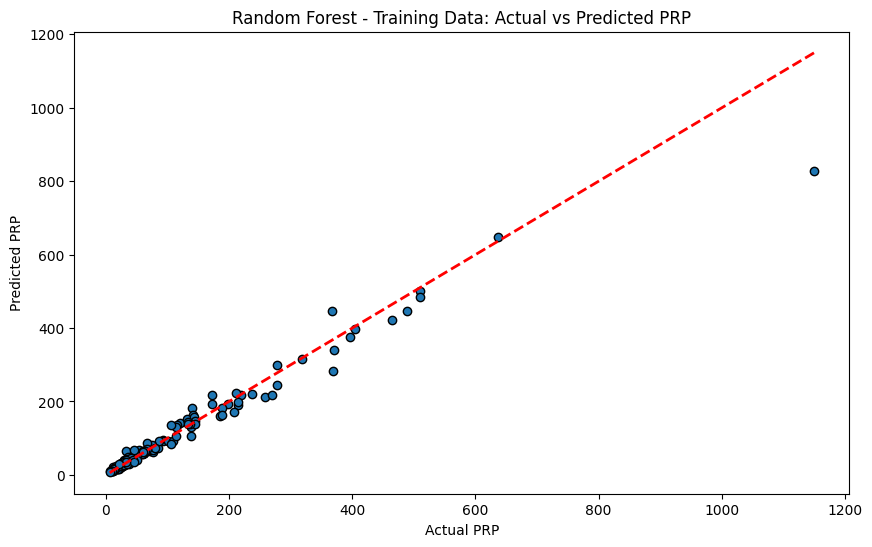

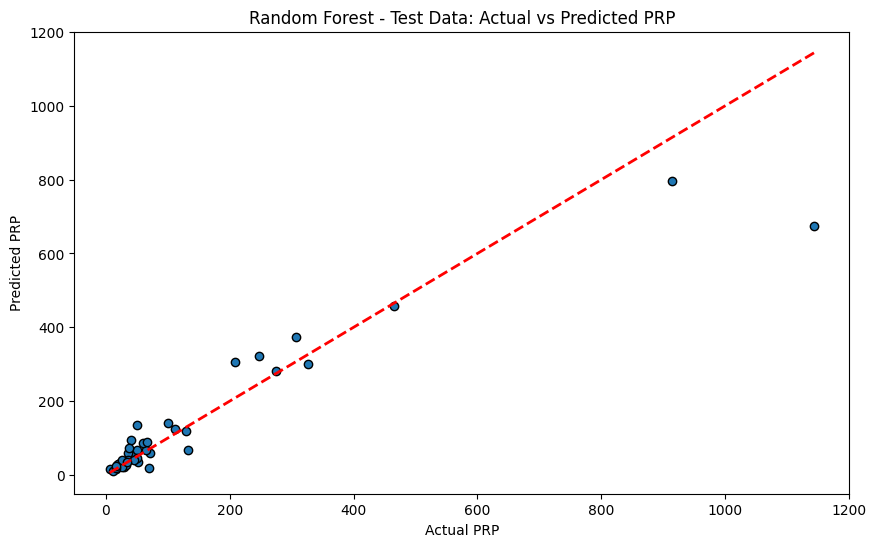

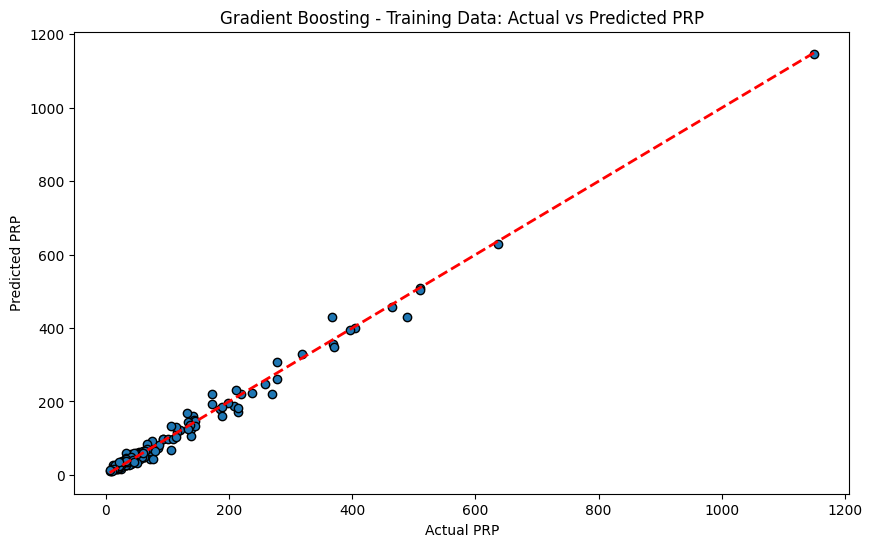

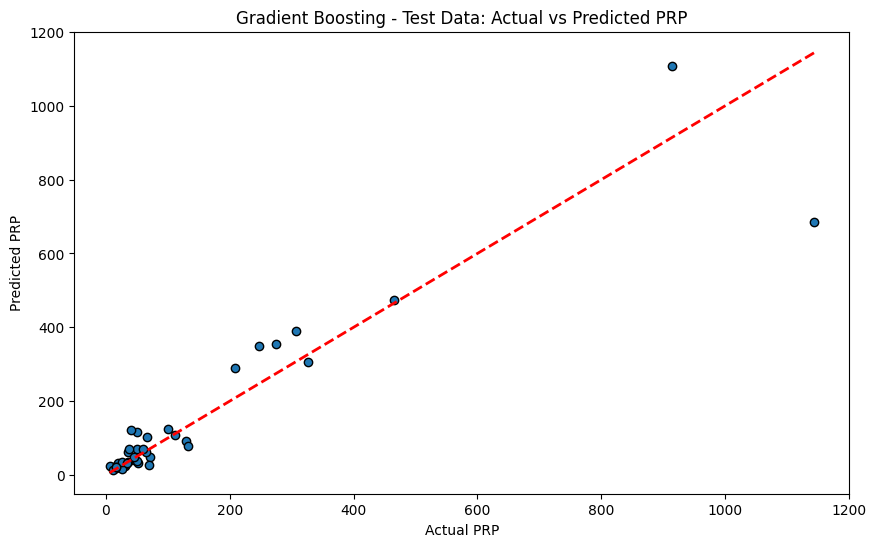

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
features = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
target = numeric_data["PRP"]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting 모델 훈련
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# 교차 검증
rf_cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
gb_cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

print(f"Random Forest - Cross-validation R^2 scores: {rf_cross_val_scores}")
print(f"Random Forest - Mean cross-validation R^2 score: {np.mean(rf_cross_val_scores)}")
print(f"Gradient Boosting - Cross-validation R^2 scores: {gb_cross_val_scores}")
print(f"Gradient Boosting - Mean cross-validation R^2 score: {np.mean(gb_cross_val_scores)}")

# 랜덤 포레스트 모델 성능 평가 (훈련 데이터)
y_train_pred_rf = rf_model.predict(X_train)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest - Training Data - Mean Squared Error (MSE): {train_mse_rf}")
print(f"Random Forest - Training Data - Mean Absolute Error (MAE): {train_mae_rf}")
print(f"Random Forest - Training Data - R^2 Score: {train_r2_rf}")

# 랜덤 포레스트 모델 성능 평가 (테스트 데이터)
y_test_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Test Data - Mean Squared Error (MSE): {test_mse_rf}")
print(f"Random Forest - Test Data - Mean Absolute Error (MAE): {test_mae_rf}")
print(f"Random Forest - Test Data - R^2 Score: {test_r2_rf}")

# Gradient Boosting 모델 성능 평가 (훈련 데이터)
y_train_pred_gb = gb_model.predict(X_train)
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)

print(f"Gradient Boosting - Training Data - Mean Squared Error (MSE): {train_mse_gb}")
print(f"Gradient Boosting - Training Data - Mean Absolute Error (MAE): {train_mae_gb}")
print(f"Gradient Boosting - Training Data - R^2 Score: {train_r2_gb}")

# Gradient Boosting 모델 성능 평가 (테스트 데이터)
y_test_pred_gb = gb_model.predict(X_test)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting - Test Data - Mean Squared Error (MSE): {test_mse_gb}")
print(f"Gradient Boosting - Test Data - Mean Absolute Error (MAE): {test_mae_gb}")
print(f"Gradient Boosting - Test Data - R^2 Score: {test_r2_gb}")

# 실제 값과 예측 값 시각화 (랜덤 포레스트, 훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rf, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Random Forest - Training Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (랜덤 포레스트, 테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Random Forest - Test Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (Gradient Boosting, 훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_gb, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Gradient Boosting - Training Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (Gradient Boosting, 테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_gb, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Gradient Boosting - Test Data: Actual vs Predicted PRP")
plt.show()
